In [1]:
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import os
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)


url="https://raw.githubusercontent.com/nikipi/WHITE_BOX/master/winequality-red.csv"

data = pd.read_csv(url)


## Load the wine data

In [2]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

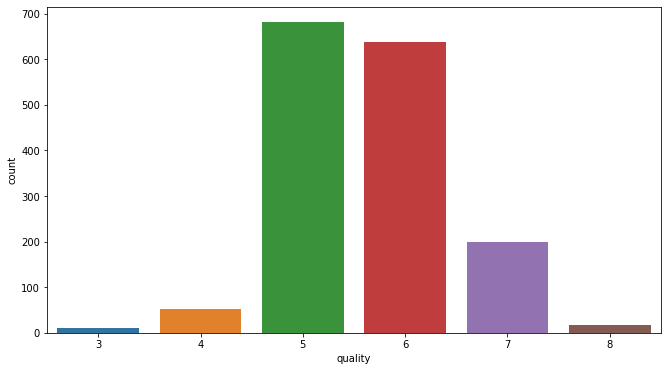

In [6]:
plt.figure(figsize = (11,6))
sns.countplot(data=data, x='quality')  # countplot --value_counts

In [7]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


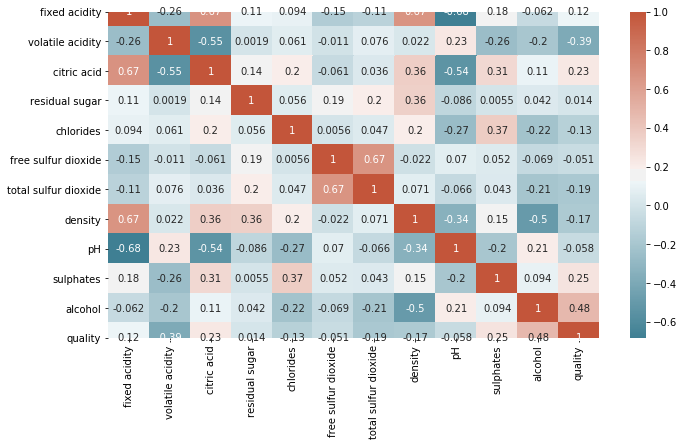

In [8]:
plt.figure(figsize = (11,6))
sns.heatmap(data.corr(), 
            xticklabels=data.corr().columns, 
            yticklabels=data.corr().columns, 
            annot=True, 
            cmap=sns.diverging_palette(220,20,
            as_cmap=True))

In [9]:
correlations = data.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


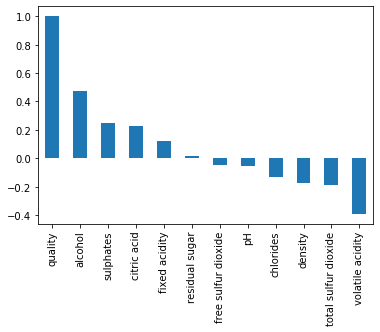

In [10]:
correlations.plot(kind='bar')

In [11]:
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric acid              True
fixed acidity           False
residual sugar          False
free sulfur dioxide     False
pH                      False
chlorides               False
density                 False
total sulfur dioxide    False
volatile acidity         True
Name: quality, dtype: bool


From the above we can see that the most correlated 3 features with the quality of the wine are alcohol, citric acid, and sulphates.Get the graphs to get more vibe from how they are influencing the quality of the wine 

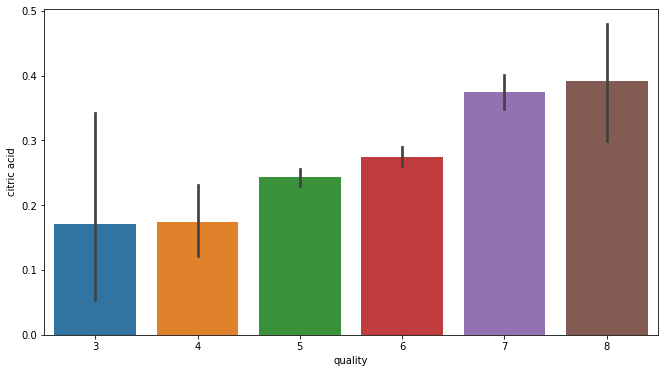

In [12]:
plt.figure(figsize = (11,6))
sns.barplot(data=data, x='quality',y='citric acid')

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

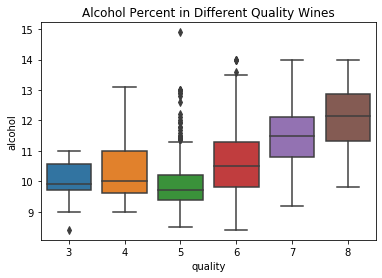

In [13]:
bp = sns.boxplot(x='quality',y='alcohol', data=data)
bp.set(title="Alcohol Percent in Different Quality Wines")

In [14]:
df_quality_five_six = data.loc[(data['quality'] >= 5) & (data['quality'] <= 6)]
df_quality_five_six['quality'].value_counts()

5    681
6    638
Name: quality, dtype: int64

"Mid quality"wines with rating 5 or 6 seems to be strange. Dig more deeper for it: 

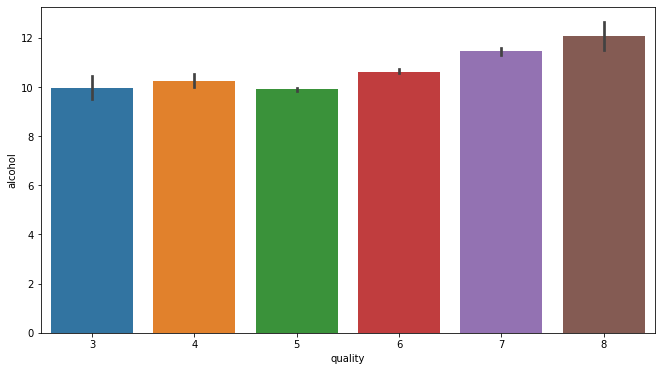

In [15]:
plt.figure(figsize = (11,6))
sns.barplot(data=data, x='quality',y='alcohol')

In [16]:
X=data.iloc[:,:-1]
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [17]:
y=data.iloc[:,-1]

## Model selection

In [18]:

X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.2, random_state=21)
classifiers = [DecisionTreeClassifier(),
    SVC(),RandomForestClassifier(),LogisticRegression(),KNeighborsClassifier(),GaussianNB()
    ]
    

trainingData    = X_train
trainingScores  = y_train
predictionData  = X_test
predictscore    = y_test

for item in classifiers:
    print(item)
    clf = item
    clf.fit(trainingData, trainingScores)
    
    y_pred = clf.predict(X_test)

    print('accuracy',metrics.accuracy_score(y_test, y_pred ))
    
    

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
accuracy 0.65625
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy 0.578125
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
accuracy 0.6875
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy 0.559375
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_

/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.49375
GaussianNB(priors=None, var_smoothing=1e-09)
accuracy 0.54375


Decision Tree(),SVC() and RandomForest seems to be good classifers for this probelm, so we only focus on these

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Support Vector Classifier

In [20]:
clf=SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
y_test.shape

(480,)

In [22]:
sum(y_pred==y_test)

286

In [23]:
print(metrics.classification_report(y_test,y_pred))   # the results for each label

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        20
           5       0.68      0.72      0.70       219
           6       0.51      0.63      0.57       178
           7       0.58      0.27      0.37        56
           8       0.00      0.00      0.00         1

    accuracy                           0.60       480
   macro avg       0.29      0.27      0.27       480
weighted avg       0.57      0.60      0.57       480



/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
newData=pca.fit_transform(X_test)

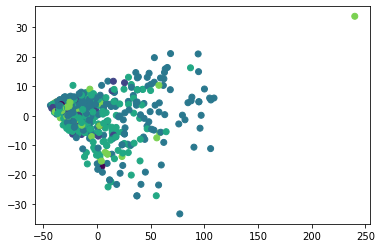

In [25]:
plt.figure()
plt.scatter(newData[:,0],newData[:,1],c=y_test)
plt.show()

do not really have a good performance do let's do some hypertuning

## Randomized Search Support Vector Classifier

In [26]:
from sklearn.model_selection import RandomizedSearchCV
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = RandomizedSearchCV(clf, param, scoring='accuracy', cv=5)


In [27]:
grid_svc.fit(X_train, y_train)

/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3,
                                              1.4],
                                        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2,
                                                  1.3, 1.4],
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, sc

In [28]:
grid_svc.best_params_

{'kernel': 'linear', 'gamma': 1.3, 'C': 1.3}

In [29]:
#Let's run SVC again with the best parameters.
model_svc2 = SVC(C = 1.1, gamma =  1.4, kernel= 'rbf')
model_svc2.fit(X_train, y_train)
pred_svc2 = model_svc2.predict(X_test)
print(classification_report(y_test, pred_svc2,labels=np.unique(y_pred)))


              precision    recall  f1-score   support

           5       0.60      0.86      0.71       219
           6       0.63      0.54      0.58       178
           7       1.00      0.27      0.42        56

   micro avg       0.62      0.66      0.64       453
   macro avg       0.74      0.56      0.57       453
weighted avg       0.66      0.66      0.62       453



In [30]:
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        20
           5       0.60      0.86      0.71       219
           6       0.63      0.54      0.58       178
           7       1.00      0.27      0.42        56
           8       0.00      0.00      0.00         1

    accuracy                           0.62       480
   macro avg       0.37      0.28      0.29       480
weighted avg       0.62      0.62      0.59       480



/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
import sklearn.datasets
import sklearn.ensemble
sklearn.metrics.accuracy_score(y_test,y_pred)

0.5958333333333333

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

model_svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
model_svc2.fit(X_train, y_train)

pred_svc2 = model_svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        20
           5       0.74      0.74      0.74       219
           6       0.60      0.76      0.67       178
           7       0.72      0.46      0.57        56
           8       0.00      0.00      0.00         1

    accuracy                           0.68       480
   macro avg       0.34      0.33      0.33       480
weighted avg       0.65      0.68      0.65       480



/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Feature Scale is critical in this case to imporve the model

## Decision Tree Classifier

In [33]:

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.80)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=2, min_samples_split=5).fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
# accuracy_score
print(metrics.accuracy_score(y_test, y_pred ))

0.565625


In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

tree_model = DecisionTreeClassifier(random_state=0, max_depth=2, min_samples_split=5).fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

# accuracy_score
print(metrics.accuracy_score(y_test, y_pred ))

0.5625


Decision tree is not affected by feature scaling because the decision tree is always divided horizontally, even if the expansion multiple of a certain variable is proportional. linear regression is not affected because the proportional relationship of the linear equation is always constant, so scaling has no effect on it.

In [35]:
# Setup the parameters and distributions to sample from: param_dist
from scipy.stats import randint
param_dist = {"max_depth": [3, None],   # set list
              "max_features": randint(1, 9),  #set distribution
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree,param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)



# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 5}
Best score is 0.5359599749843652


In [36]:
y_pred = tree_cv.predict(X_test)
# accuracy_score
print(metrics.accuracy_score(y_test, y_pred ))

0.475


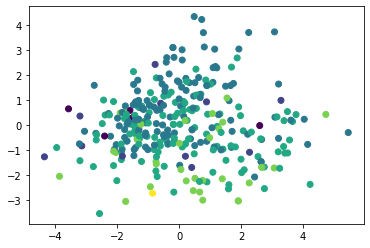

In [37]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
newData=pca.fit_transform(X_test)
plt.figure()
plt.scatter(newData[:,0],newData[:,1],c=y_test)
plt.show()

In [38]:
from pygam import LinearGAM
lams = np.random.rand(100, 11) # 11 is the # of feature columns
lams = lams * 11 - 3
lams = np.exp(lams)
print(lams.shape)
gam = LinearGAM(n_splines=10).gridsearch(X.values,y, lam=lams)

  1% (1 of 100) |                        | Elapsed Time: 0:00:00 ETA:   0:00:16

(100, 11)


100% (100 of 100) |######################| Elapsed Time: 0:00:19 Time:  0:00:19


<Figure size 432x288 with 0 Axes>

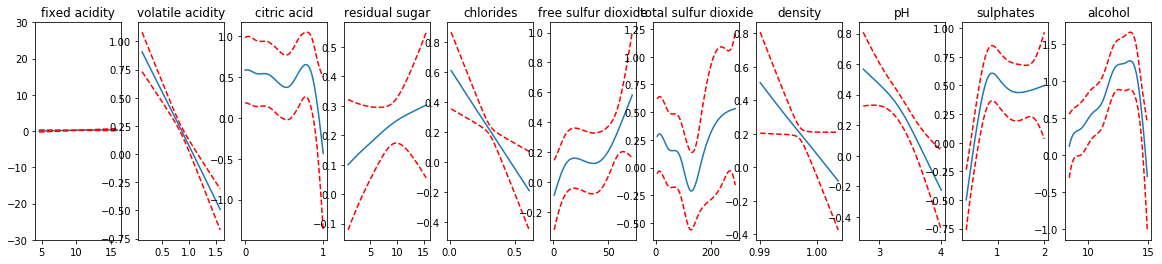

In [39]:
titles = data.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,11,figsize=(20, 4))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

In [40]:
lrmodel=LogisticRegression()
lrmodel.fit(X_train,y_train)
logpred=lrmodel.predict(X_test)
print(classification_report(y_test, logpred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        12
           5       0.66      0.78      0.71       138
           6       0.58      0.64      0.61       129
           7       0.50      0.23      0.31        35
           8       0.00      0.00      0.00         1

    accuracy                           0.62       320
   macro avg       0.29      0.27      0.27       320
weighted avg       0.57      0.62      0.59       320



/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
rand_forest_val = cross_val_score(estimator = tree_cv, X = X_train, y = y_train, cv =3)
rand_forest_val.mean()

/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/s

0.5245465190782351

In [42]:
svc_val = cross_val_score(estimator = tree_model, X = X_train, y = y_train, cv = 10)
svc_val.mean()

/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.541216481819078

In [43]:
svc_val = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
svc_val.mean()

/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/PycharmPro

0.6167491786024301

In [44]:
svc_val = cross_val_score(estimator = model_svc2, X = X_train, y = y_train, cv = 10)
svc_val.mean()

/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.6331788820519939

In [45]:
svc_val = cross_val_score(estimator =lrmodel, X = X_train, y = y_train, cv = 10)
svc_val.mean()

/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solve

0.5865373868291484